## 1. Simple regression is to predict one variable based on another.

It is linear, x is what will predict. 

B1 is the slope and change in y for each x, and b0 is the y intercept. 

E is the error

y=b1*x+b0 + e

https://chatgpt.com/share/672dd46b-e4dc-8006-a0be-441a947c57c0 - ran out of gpt4.0 couldn't type anymore

"In a Simple Linear Regression (SLR) model, the goal is to model the relationship between a predictor variable 
𝑥
x (also called the independent variable) and an outcome variable 
𝑌
Y (also called the dependent variable). The model assumes that 
𝑌
Y is linearly dependent on 
𝑥
x with some random error (noise)."

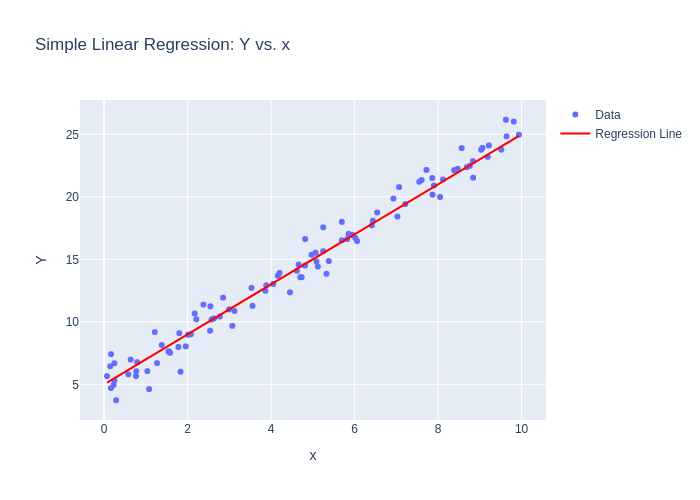

In [2]:
import numpy as np
import scipy.stats as stats
import plotly.graph_objects as go

# Set parameters
n = 100        # Number of data points
beta0 = 5      # Intercept
beta1 = 2      # Slope
sigma = 1      # Standard deviation of the error term

# Generate predictor variable (x) from a uniform distribution
x = np.random.uniform(0, 10, n)

# Generate error terms (epsilon) from a normal distribution
epsilon = np.random.normal(0, sigma, n)

# Compute the outcome variable (Y) based on the SLR model equation
Y = beta0 + beta1 * x + epsilon

# Create a scatter plot
fig = go.Figure()

# Add the data points
fig.add_trace(go.Scatter(x=x, y=Y, mode='markers', name='Data'))

# Add the theoretical regression line (without noise)
y_line = beta0 + beta1 * x
fig.add_trace(go.Scatter(x=x, y=y_line, mode='lines', name='Regression Line', line=dict(color='red')))

# Display the plot
fig.update_layout(title='Simple Linear Regression: Y vs. x',
                  xaxis_title='x', yaxis_title='Y')
fig.show(renderer="png")

https://chatgpt.com/share/672dd50d-13a8-8006-b1a8-a19a91d677dc

## 2. 

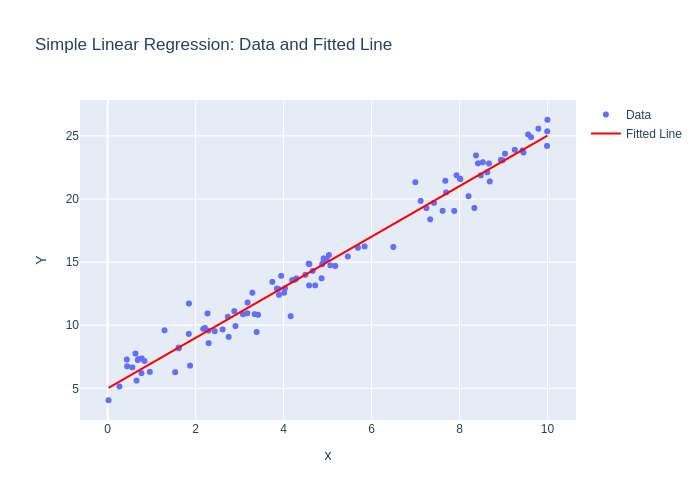

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     3523.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           1.26e-78
Time:                        09:11:46   Log-Likelihood:                -140.46
No. Observations:                 100   AIC:                             284.9
Df Residuals:                      98   BIC:                             290.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0023      0.192     26.060      0.0

In [5]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import statsmodels.formula.api as smf

# Step 1: Set parameters for the simulated SLR model
n = 100        # Number of data points
beta0 = 5      # Intercept
beta1 = 2      # Slope
sigma = 1      # Standard deviation of the error term

# Step 2: Simulate the dataset
x = np.random.uniform(0, 10, n)
epsilon = np.random.normal(0, sigma, n)
Y = beta0 + beta1 * x + epsilon

# Step 3: Create a pandas DataFrame for the data
data = pd.DataFrame({'x': x, 'Y': Y})

# Step 4: Fit the Simple Linear Regression model using statsmodels
model = smf.ols('Y ~ x', data=data).fit()

# Step 5: Visualize the data points and the fitted regression line
fig = go.Figure()

# Add the data points
fig.add_trace(go.Scatter(x=data['x'], y=data['Y'], mode='markers', name='Data'))

# Add the fitted regression line
fitted_values = model.predict(data['x'])
fig.add_trace(go.Scatter(x=data['x'], y=fitted_values, mode='lines', name='Fitted Line', line=dict(color='red')))

# Update layout and display the plot
fig.update_layout(title='Simple Linear Regression: Data and Fitted Line',
                  xaxis_title='x', yaxis_title='Y')
fig.show(renderer="png")

# Optionally print the model summary
print(model.summary())


## 3.

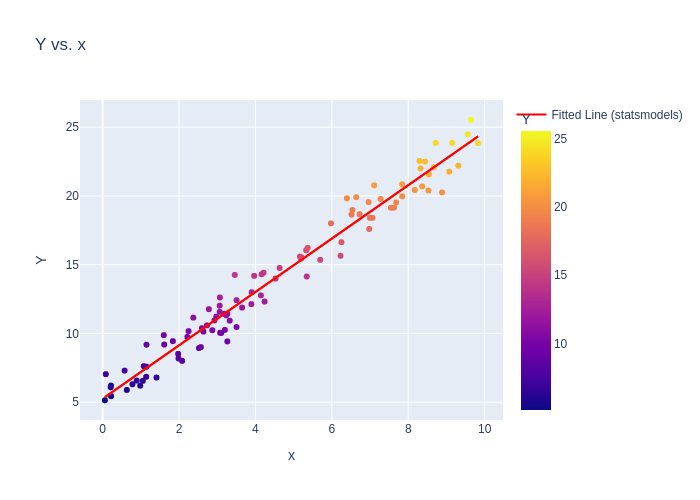

In [9]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm

# Step 1: Generate the simulated data (same as in Question 1)
n = 100
beta0 = 5
beta1 = 2
sigma = 1
x = np.random.uniform(0, 10, n)
epsilon = np.random.normal(0, sigma, n)
Y = beta0 + beta1 * x + epsilon

# Step 2: Create a DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Step 3: Fit the Simple Linear Regression model using statsmodels
X = sm.add_constant(x)  # Add constant (intercept) term
model = sm.OLS(Y, X).fit()

# Step 4: Visualize using plotly.express for scatter plot with OLS trendline
fig = px.scatter(df, x='x', y='Y', color='Y', trendline='ols', title='Y vs. x')

# Step 5: Add the manually fitted regression line from statsmodels to the plot
fitted_values = model.predict(X)
fig.add_trace(go.Scatter(x=x, y=fitted_values, mode='lines', name='Fitted Line (statsmodels)', line=dict(color='red')))

# Step 6: Display the plot
fig.show(renderer="png")


The difference is one is fitted one is theoretical.

https://chatgpt.com/share/672dd50d-13a8-8006-b1a8-a19a91d677dc

## 4.  Explain how fitted_model.fittedvalues are derived on the basis of fitted_model.summary().tables[1] (or more specifically fitted_model.params or fitted_model.params.values)

The values are derived from the model used to predict the stats. "fitted_model.params.values are the estimated coefficients that define the regression line.
fitted_model.fittedvalues are the predicted values (the actual Y values predicted by the regression model for the given X values)."

## 5. 

It is used because it finds the least squared differences of the values needed. The squares is needed to to avoid negative differences and to find the best line based on average distance.
https://chatgpt.com/share/672dda8f-6bb8-8006-a354-c0fb6c730454

## 6. 
Explain why the first expression below can be interpreted as "the proportion of variation in (outcome) Y explained by the model (i.e. fitted_model.fittedvalues)"; and therefore, why fitted_model.rsquared can be interpreted as a measure of the accuracy of the model; and, therefore what the two np.corrcoef(...)[0,1]**2 expressions capture in the context of Simple Linear Regression models.
1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()
fitted_model.rsquared
np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2
np.corrcoef(Y,x)[0,1]**2

It can be interpreted as "the proportion of variation in (outcome) Y explained by the model (i.e. fitted_model.fittedvalues)" because the numerator and denominator give r squared and another calculated version of it. It can be accuracy of model beacause it is a calculation of the data which is r-squared or the accuracy.

## 7.

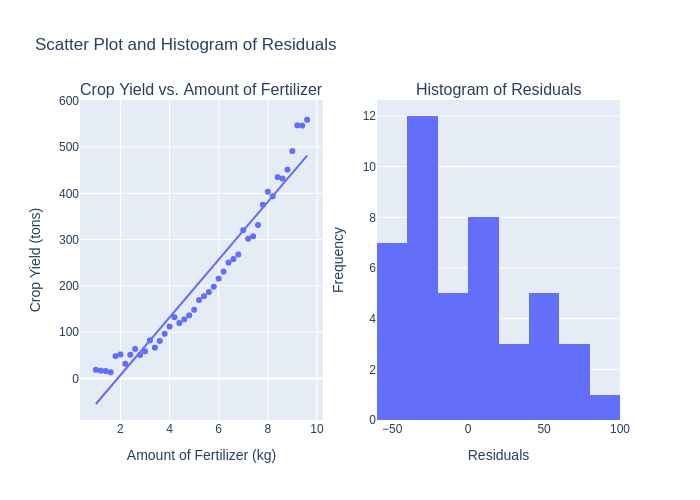

In [14]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)
fig.show(renderer="png")

In Simple Linear Regression (SLR), several assumptions must hold for the model to be valid. Below are a couple of assumptions that may not be compatible with the example data provided (the relationship between the amount of fertilizer used and crop yield):

### 1. **Linearity of the Relationship**
   - **Assumption**: The relationship between the predictor variable (amount of fertilizer, \(x\)) and the outcome variable (crop yield, \(Y\)) must be linear. That is, the change in \(Y\) is assumed to be proportional to the change in \(x\).
   - **Potential Issue**: The data shown in the example suggests a **non-linear relationship** between fertilizer use and crop yield. As fertilizer use increases, crop yield increases at an accelerating rate, indicating that the relationship might be better captured by a **curvilinear model** (e.g., polynomial regression or a logarithmic model). The scatter plot shows a clear curve, which is inconsistent with the assumption of linearity.
   
   - **Visualization Insight**: Looking at the scatter plot, the rate of increase in crop yield seems to accelerate as the amount of fertilizer increases, implying that a linear model may not fully capture the underlying relationship.

### 2. **Constant Variance of Errors (Homoscedasticity)**
   - **Assumption**: The variance of the residuals (errors) should be constant across all levels of the predictor variable. This is known as **homoscedasticity**.
   - **Potential Issue**: From the histogram of residuals, we can observe whether the residuals exhibit constant variance. If the spread of the residuals increases or decreases systematically with the value of \(x\) (fertilizer), it would indicate **heteroscedasticity**, which violates the homoscedasticity assumption. A quick glance at the histogram or a plot of residuals vs. \(x\) would reveal if this is the case.

   - **Visualization Insight**: If the residuals display a funnel shape (increasing spread as \(x\) increases), this would indicate heteroscedasticity. The model assumes that the variance of the errors is constant, which may not hold here if there's increasing variability in crop yields with higher fertilizer amounts.

### Additional Considerations:
- **Normality of Errors**: The residuals should be normally distributed. If the histogram of residuals shows substantial skewness or a non-normal distribution, this assumption would also be violated.
  
- **Independence of Errors**: The residuals should be independent of each other, which might not be clear just from the plot but can be assessed through tests like the Durbin-Watson test.

These assumptions are critical for ensuring that the Simple Linear Regression model is appropriate and that the results (such as the fitted line and R² value) are valid. If any of these assumptions are violated, the interpretation of the model may be flawed, and more advanced models might be needed.

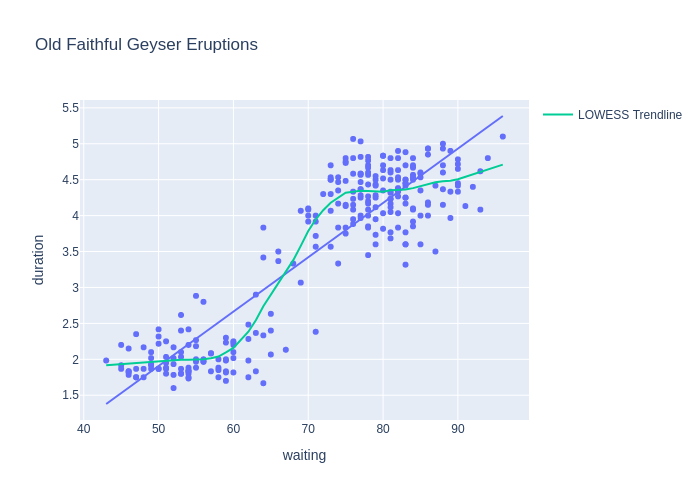

In [15]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

https://chatgpt.com/share/672dda8f-6bb8-8006-a354-c0fb6c730454

## 8.

A null hypo means no linear association. We can use this to see if the predictor and data are related.

If the p-value is small (typically < 0.05): We have evidence to reject the null hypothesis and conclude that there is a statistically significant linear relationship between waiting time and duration. The relationship is not due to random chance.

If the p-value is large (typically > 0.05): We fail to reject the null hypothesis, meaning there isn't strong evidence to suggest a linear relationship between waiting time and duration. The data does not provide enough evidence to conclude a linear association exists.

In [16]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        09:56:48   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 9.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


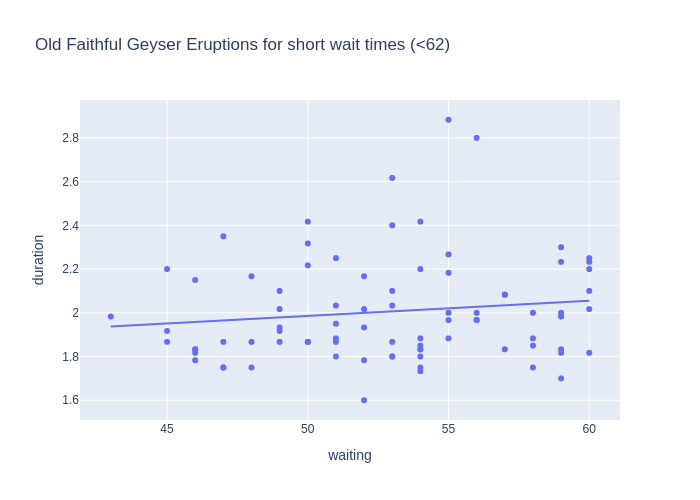

In [22]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit =62 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

It depends on significance  https://chatgpt.com/share/672dda8f-6bb8-8006-a354-c0fb6c730454

## 10.

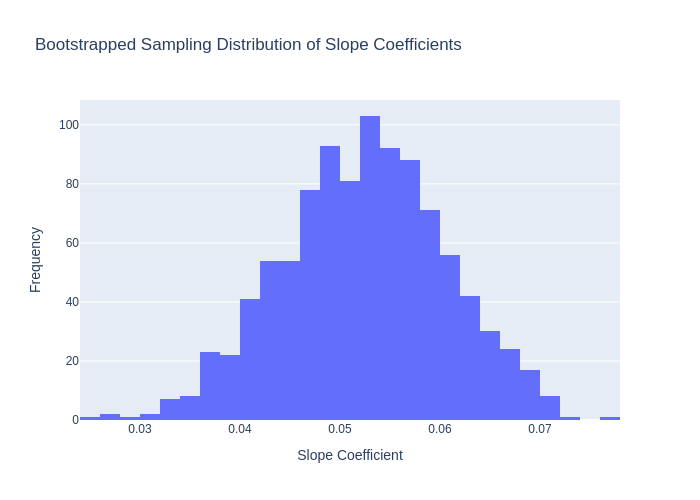

In [24]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Get the long wait times data
long_wait_limit = 63  # Use this to filter long wait times (assuming 63 minutes is the cutoff for long waits)
long_wait = old_faithful.waiting >= long_wait_limit
long_wait_data = old_faithful[long_wait]

# Number of bootstrap samples
n_bootstraps = 1000
slope_bootstrap = []

# Perform bootstrapping
for _ in range(n_bootstraps):
    sample = long_wait_data.sample(n=160, replace=True)  # Sample with replacement
    model = smf.ols('duration ~ waiting', data=sample).fit()  # Fit SLR model
    slope_bootstrap.append(model.params['waiting'])  # Collect the fitted slope

# Visualize the bootstrapped slope distribution
fig = px.histogram(x=slope_bootstrap, title='Bootstrapped Sampling Distribution of Slope Coefficients')
fig.update_xaxes(title_text='Slope Coefficient')
fig.update_yaxes(title_text='Frequency')
fig.show(renderer="png")

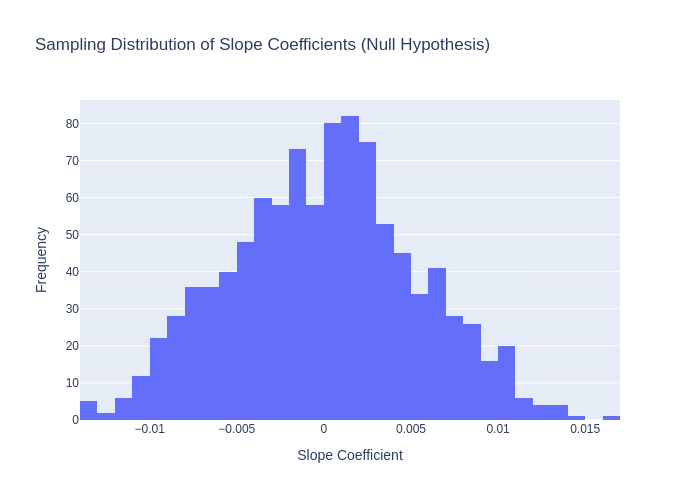

In [30]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Get the long wait times data (n=160)
long_wait_limit = 63  # Define long wait times cutoff
long_wait = old_faithful.waiting >= long_wait_limit
long_wait_data = old_faithful[long_wait]

# Set parameters for simulation (null hypothesis: beta1 = 0)
n_simulations = 1000  # Number of simulations
simulated_slope_null = []  # List to store slope coefficients

# Mean and standard deviation of residuals from original data
original_model = smf.ols('duration ~ waiting', data=long_wait_data).fit()
residuals = original_model.resid
residual_std = residuals.std()

# Simulate the response variable under the null hypothesis (beta1 = 0)
for _ in range(n_simulations):
    # Generate simulated Y values based on waiting times and no linear relationship
    Y_simulated = np.random.normal(loc=long_wait_data['duration'].mean(), 
                                   scale=residual_std, 
                                   size=len(long_wait_data))  # Match size with the data (n=160)
    simulated_data = pd.DataFrame({'waiting': long_wait_data['waiting'], 'duration': Y_simulated})
    
    # Fit Simple Linear Regression model to the simulated data
    model = smf.ols('duration ~ waiting', data=simulated_data).fit()
    simulated_slope_null.append(model.params['waiting'])  # Collect the fitted slope

# Visualize the sampling distribution of the simulated slopes under the null hypothesis
fig = px.histogram(x=simulated_slope_null, title='Sampling Distribution of Slope Coefficients (Null Hypothesis)')
fig.update_xaxes(title_text='Slope Coefficient')
fig.update_yaxes(title_text='Frequency')
fig.show(renderer="png")

In [31]:
# Calculate the 95% confidence interval for the bootstrapped slopes
bootstrap_conf_interval = np.percentile(slope_bootstrap, [2.5, 97.5])
print(f'95% Bootstrapped Confidence Interval for Slope: {bootstrap_conf_interval}')


95% Bootstrapped Confidence Interval for Slope: [0.03643471 0.06819118]


In [32]:
# Get the fitted model for the original long wait data
original_model = smf.ols('duration ~ waiting', data=long_wait_data).fit()
original_slope = original_model.params['waiting']

# Check if the original slope is within the confidence interval
is_within_interval = bootstrap_conf_interval[0] <= original_slope <= bootstrap_conf_interval[1]
print(f'Is the original slope within the 95% confidence interval? {is_within_interval}')


Is the original slope within the 95% confidence interval? True


In [33]:
# Calculate p-value from the bootstrapped slopes
p_value_simulated = np.mean(np.abs(np.array(slope_bootstrap)) >= np.abs(original_slope))
print(f'Simulated p-value: {p_value_simulated}')


Simulated p-value: 0.479


In [34]:
# Extract p-value from the original model
original_p_value = original_model.pvalues['waiting']
print(f'Original model p-value: {original_p_value}')


Original model p-value: 2.3467760466093927e-18


## 11.

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


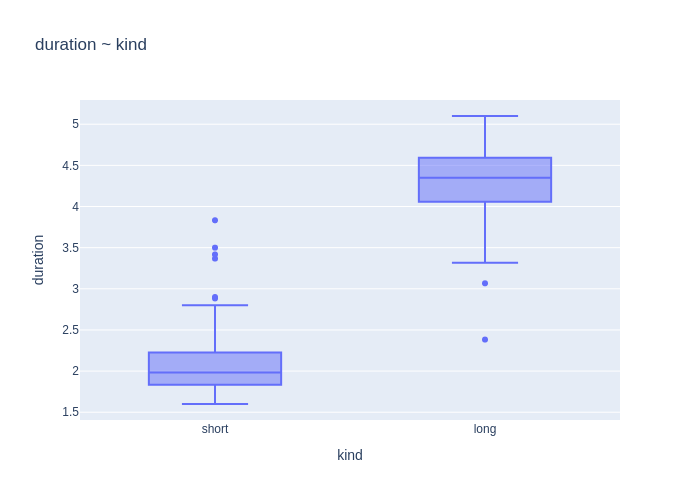

In [38]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

The first model showed a continuous linear relationship between wait and duration while this new one looked at average difference and non continuous. The continuous is linear and may not be as flexible in modleing data. The new one can better show the big jumps. - Mine


This model specification allows us to directly test and quantify differences between short and long wait times in eruption duration, a perspective that is not fully achievable in the continuous or subset-based models. It provides a more flexible framework by combining both continuous and categorical insights, giving a more nuanced understanding of how waiting time influences eruption duration.






-gpt

## 12.

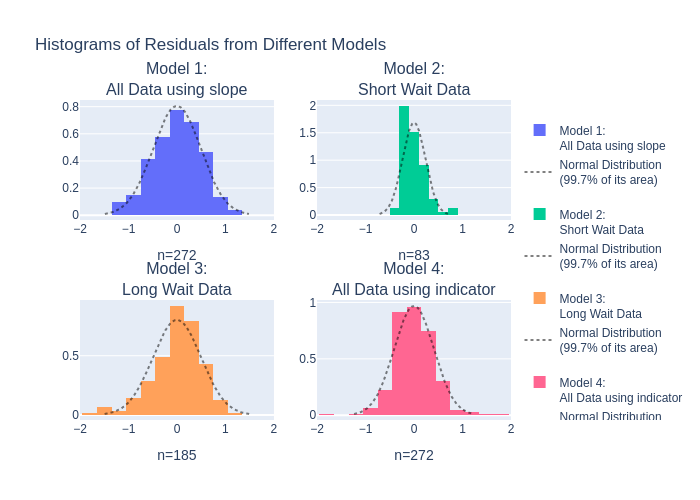

In [39]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png")

Model 1 because it has the least deviations from a normal curve though it uses slope which may not be the best, model 2 and 3 only use 1 type of data which wont work. Model 4 slightly deviates from a normal curve I think 

13.

In [4]:
import numpy as np
import seaborn as sns

# Load the Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Generate two subsets: 'short' and 'long' wait times
short_wait_data = old_faithful[old_faithful['waiting'] < 68]['duration']
long_wait_data = old_faithful[old_faithful['waiting'] >= 68]['duration']

# Observed mean difference between 'short' and 'long' wait groups
observed_mean_diff = long_wait_data.mean() - short_wait_data.mean()

# Permutation test
n_permutations = 10000  # Number of shuffles
mean_diffs = []  # List to store mean differences for each permutation

# Concatenate both groups for shuffling
combined_data = np.concatenate([short_wait_data, long_wait_data])

for _ in range(n_permutations):
    # Shuffle the combined data
    np.random.shuffle(combined_data)
    
    # Split back into two groups of original sizes
    permuted_short = combined_data[:len(short_wait_data)]
    permuted_long = combined_data[len(short_wait_data):]
    
    # Calculate and store the mean difference for this permutation
    permuted_mean_diff = permuted_long.mean() - permuted_short.mean()
    mean_diffs.append(permuted_mean_diff)

# Calculate the p-value: the probability of observing a mean difference as extreme as the observed one
p_value = np.sum(np.abs(mean_diffs) >= np.abs(observed_mean_diff)) / n_permutations

# Display the result
print(f"Observed mean difference: {observed_mean_diff}")
print(f"P-value from permutation test: {p_value}")


Observed mean difference: 2.2036002325581396
P-value from permutation test: 0.0


In [5]:
import numpy as np
import seaborn as sns

# Load the Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Generate two subsets: 'short' and 'long' wait times
short_wait_data = old_faithful[old_faithful['waiting'] < 68]['duration']
long_wait_data = old_faithful[old_faithful['waiting'] >= 68]['duration']

# (B) Create a 95% bootstrap confidence interval for the difference in means
n_bootstraps = 10000  # Number of bootstrap samples
bootstrapped_mean_diffs = []  # List to store mean differences for each bootstrap

for _ in range(n_bootstraps):
    # Bootstrap sample within each group (with replacement)
    short_bootstrap = np.random.choice(short_wait_data, size=len(short_wait_data), replace=True)
    long_bootstrap = np.random.choice(long_wait_data, size=len(long_wait_data), replace=True)
    
    # Calculate the difference in means for this bootstrap sample
    mean_diff = long_bootstrap.mean() - short_bootstrap.mean()
    bootstrapped_mean_diffs.append(mean_diff)

# Calculate the 95% bootstrap confidence interval for the difference in means
lower_bound, upper_bound = np.quantile(bootstrapped_mean_diffs, [0.025, 0.975])

print(f"95% Bootstrap Confidence Interval for the difference in means: ({lower_bound}, {upper_bound})")


95% Bootstrap Confidence Interval for the difference in means: (2.102326063953489, 2.3005637441860465)


https://chatgpt.com/share/672dda8f-6bb8-8006-a354-c0fb6c730454

The p test will give show if these results by giving a null hypo and random assign short or long then measure and see if the result is statistically significant (.005>p)

The bootstrap CI will resample the data randomly within a group thousands of times, and created a bootstrapped CI from it to determine whether or not it is within the interval.